# 1. Simulating the data

Using	np.random.choice,	generate	100	megabytes	(8	bits/byte	*	1e6 bytes/megabyte)	of	random	data	containing	100%,	90%,	80%,	70%,	60%,	and	50%	zeros.	Be	sure	to	call	np.packbits	on	your	data	before	writing	it	to	a	file.	

Code:

In [21]:
import numpy as np


Since 1Mb is 8e+6 bits, 100Mb is 8e+8 bits, so our size parameter should be 800000000.
However, due to memory constraints, none of the commands were able to run with 100Mb as the size parameter. 
Thus, I have used 10Mb for each block of random data, with a size parameter of 80000000.

In [33]:
myvar_100 = np.random.choice([0, 1], size=80000000, replace=True, p=[1.0, 0.0]) #100% zeros
myvar_100 = np.packbits(myvar_100)
open("myvar_100", "wb").write(myvar_100)

10000000

In [34]:
myvar_90 = np.random.choice([0, 1], size=80000000, replace=True, p=[0.9, 0.1]) #90% zeros
myvar_90 = np.packbits(myvar_90)
open("myvar_90", "wb").write(myvar_90)

10000000

In [35]:
myvar_80 = np.random.choice([0, 1], size=80000000, replace=True, p=[0.8, 0.2]) #80% zeros
myvar_80 = np.packbits(myvar_80)
open("myvar_80", "wb").write(myvar_80)

10000000

In [36]:
myvar_70 = np.random.choice([0, 1], size=80000000, replace=True, p=[0.7, 0.3]) #70% zeros
myvar_70 = np.packbits(myvar_70)
open("myvar_70", "wb").write(myvar_70)

10000000

In [37]:
myvar_60 = np.random.choice([0, 1], size=80000000, replace=True, p=[0.6, 0.4]) #60% zeros
myvar_60 = np.packbits(myvar_60)
open("myvar_60", "wb").write(myvar_60)

10000000

In [38]:
myvar_50 = np.random.choice([0, 1], size=80000000, replace=True, p=[0.5, 0.5]) #50% zeros
myvar_50 = np.packbits(myvar_50)
open("myvar_50", "wb").write(myvar_50)

10000000

Next,	we generate	one DNA	and	one protein	sequence, each	100	million	letters	long,	and	write	those	to	the	home	directory.	

In [28]:
residues = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'] 
residue_probs = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
nucleotides = ['A', 'C', 'T', 'G']
#residue/nucleotides arrays, for viewing convenience


In [29]:
DNA = np.random.choice(nucleotides, size=(100000000), replace=True, p=[0.25, 0.25, 0.25, 0.25])
protein = np.random.choice(residues, size=(100000000), replace=True, p=residue_probs)

In [40]:
open("protein.fa", "w").write("".join(protein))
open("nucleotide.fa", "w").write("".join(protein))

100000000

# 2. Compressing the data

We will now compress the data in the terminal, using the commands given in the spec. 

For the 100% zeros file:

For the 90% zeros file

For the 80% zeros file:

For the 70% zeros file:

For the 60% zeros file:

For the 50% zeros file:

For the nucleotide file:

For the protein sequence file:

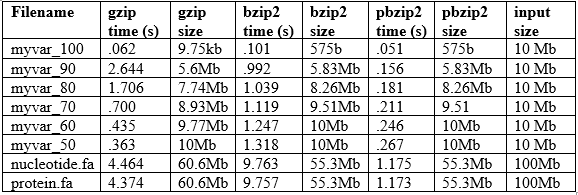

Above we have a comparison of all three compression algorithms, comparing output size and runtime. 

# 3. Questions

1. Which	algorithm	achieves	the	best	level	of	compression	on	each	file	type?

For the random data files, gzip achieves the best level of compression. For the nucleotide and protein files, it can be either bzip2 or pbzip2.

2. Which algorithm is the fastest?

Overall, pbzip2 was the fastest. 

3. What is the difference between bzip2 and pbzip2? Do you expect one to be faster and why? 

pbzip2 uses parallel thread implementation of bzip2 while bzip2 uses a single thread, so pbzip2 can sort faster (multiple threads versus only one for the same number of bits). 

4. How does the level of compression change as the percentage of zeros increases? Why does this happen?

There is more redundancy in the file as the percentage of zeros increases, so we can assign fewer bits to zeros than we can to ones. The more zeros we have in comparison to ones, the more we can compress the file. 

5. What is the minimum number of bits required to store a single DNA base?

Since there are 4 DNA bases, we would need 2 bits. 


6. What is the minimum number of bits required to store an amino acid letter?

Since there are 20 amino acid letters, we would need 5 bits. 

7. In your tests, how many bits did gzip and bzip2 actually require to store your random DNA and protein sequences?

gzip required 60.6MB, and bzip2 required 55.3Mb. 

8. Are gzip and bzip2 performing well on DNA and proteins?

Yes, they are. They both reduce the number of bits required by about half. 

# 4. Compressing real data

1. A priori, do you expect to achieve better or worse compression here than random data? Why?

We expect to achieve better compression, since the sequences will be functional and contain motifs, domains etc., and thus not randomly distributed. 

2. How does the compression ratio of this file compare to random data?

It is lower, since we achieved better compression. 


# 5. Estimating compression of 1000 terabytes

Given	the	benchmarking	data	you	obtained	in	this	lab,	which	algorithm	do	you	propose	to	use	for	each	type	of	data?	Provide	an	estimate	for	the	fraction	of	space	you	can	save	using	your	compression	scheme.	How	much	of	a	bonus	do	you	anticipate	receiving	this	year?	

For the re-sequencing data, we would use pbzip2, and we would use the same for the protein sequences. For the binary miscroscope images, we could use either bzip2 or pbzip2; they both performed better on the nucleotide sequence (which was uniformly distributed) than gzip. 

pbzip2 went down to 575B out of 10Mb for the 100% zero sequence;
we can expect to keep 80*(5.75/100) = 4.6%.
pbzip2 saved about 53.5Mb out of 100Mb for the protein sequences;
we can expect to keep 10*(53.5/100) = 5.35%. Since it performed about the same for random sequences, we retain another 5.35%. That means we saved 84.7% of the data. Since every 1% reduction translates into a 500$ saving, the bonus will be 84.7 * 500 = $ 42,350. 